In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
df = pd.read_csv('chatgpt_daily_tweets.csv')

In [4]:
df.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,ในใจJacksonwang,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,NaN,13640.0,0.0,0.0,0.0
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,ミミズクりんゆ,DRVO_Project,東京←岐阜,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,NaN,0.0,0.0,0.0,290.0
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,NaN,628.0,0.0,0.0,0.0
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,NaN,0.0,0.0,0.0,58.0
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,NaN,0.0,0.0,0.0,0.0


In [8]:
df.dtypes

tweet_id                 object
tweet_created            object
tweet_extracted          object
text                     object
lang                     object
user_id                  object
user_name                object
user_username            object
user_location            object
user_description         object
user_created             object
user_followers_count    float64
user_following_count    float64
user_tweet_count        float64
user_verified            object
source                  float64
retweet_count           float64
like_count              float64
reply_count             float64
impression_count        float64
dtype: object

In [25]:
df_relevante = df.query("like_count > 0") #selecionando tweets com pelo menos uma curtida


**Note quantos tweets existem sem nenhum like, muito provavelmente criados por bots**

In [29]:
print(len(df_relevante))
print(len(df))

6824
66375


In [47]:
df_relevante = df_relevante.drop(columns=['tweet_extracted', 'tweet_id', 'user_description', 'user_created', 'user_followers_count', 'user_following_count', 'source', 'user_tweet_count', 'user_verified', 'user_id', 'user_name', 'user_username'])
#limpando o df
df_relevante.head()

In [39]:
def traduzir(tweet):
    return GoogleTranslator(source='auto', target='en').translate(tweet)
#função para traduzir o tweet

In [49]:
df_100 = df_relevante.head(100)
#df com as 100 primeiras linhas

In [50]:
df_100['traduzido'] = df_100['text'].apply(traduzir)
#cria coluna nova traduzida para ingles

C:\Users\victo\AppData\Local\Temp\ipykernel_26224\2886981343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['traduzido'] = df_100['text'].apply(traduzir)


In [77]:
analyzer = SentimentIntensityAnalyzer()
def analisar(tweet, tipo):
    result = analyzer.polarity_scores(tweet)
    return result[tipo]
#função para analise de sentimento dos tweets

In [78]:
df_100['neg'] = df_100['traduzido'].apply(lambda x: analisar(x, 'neg'))
df_100['pos'] = df_100['traduzido'].apply(lambda x: analisar(x, 'pos'))
df_100['neu'] = df_100['traduzido'].apply(lambda x: analisar(x, 'neu'))

##cria colunas para os sentimentos da coluna traduzida


C:\Users\victo\AppData\Local\Temp\ipykernel_26224\2578934603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['neg'] = df_100['traduzido'].apply(lambda x: analisar(x, 'neg'))
C:\Users\victo\AppData\Local\Temp\ipykernel_26224\2578934603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['pos'] = df_100['traduzido'].apply(lambda x: analisar(x, 'pos'))
C:\Users\victo\AppData\Local\Temp\ipykernel_26224\2578934603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [86]:
df_100.tail()

,tweet_created,text,lang,user_location,retweet_count,like_count,reply_count,impression_count,traduzido,neg,pos,neu
660,2023-04-03 17:59:56+00:00,@axel_yoh @paulinenjoroge Chatgpt seen. Says a...,en,"All over Africa, mostly",0.0,1.0,0.0,303.0,@axel_yoh @paulinenjoroge Chatgpt seen. Says a...,0.097,0.000,0.903
662,2023-04-03 02:59:36+00:00,I’m really depressed. I gave GPT4 some of the ...,en,NaN,0.0,23.0,10.0,3711.0,I’m really depressed. I gave GPT4 some of the ...,0.040,0.268,0.693
672,2023-04-03 15:59:29+00:00,"If ChatGPT writes code for you, is it owned by...",en,"Pittsburgh, PA",0.0,2.0,0.0,46.0,"If ChatGPT writes code for you, is it owned by...",0.000,0.000,1.000
673,2023-04-03 22:59:06+00:00,ChatGPTがもっと進化すれば議員の大半がいらなくなるって聞いた。\n夢のような世界だわ…...,ja,NaN,0.0,4.0,1.0,316.0,"I heard that if ChatGPT evolves more, most of ...",0.000,0.108,0.892
675,2023-04-03 21:59:32+00:00,@amyglobalkids I'm thinking about demonstratin...,en,"Milford, NJ",0.0,1.0,1.0,46.0,@amyglobalkids I'm thinking about demonstratin...,0.000,0.250,0.750


In [110]:
df_novo = df_relevante.groupby('lang').count()[['text']].reset_index().rename(columns={'text': 'quantidade'})
#cria um df com a quantidade de cada lingua
#usa o df maior, não traduzido


In [126]:
df_novo = df_novo.sort_values('quantidade', ascending = False)
df_novo = df_novo.query('quantidade >= 50')
#ordena as quantidades e tira as linguas com menos de 50 tweets

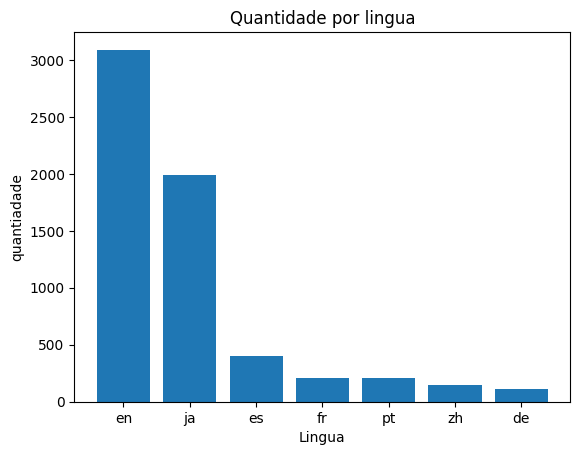

In [127]:
plt.bar(df_novo['lang'], df_novo['quantidade'])
plt.xlabel('Lingua')
plt.ylabel('quantiadade')
plt.title('Quantidade por lingua')
plt.show()
